In [1]:
#PyTorch workflow
import torch 
from torch import nn 

NN contains all neural networks of Pytorch 

In [2]:
import matplotlib

In [3]:
import matplotlib.pyplot as plt

In [4]:
torch.__version__

'1.13.0+cu116'

In [5]:
## Data (Preparing and Loading)

Machine learning key steps:

 


*   Take Inputs 
*   Convert that input in the form of numericals
*   With the numericals obtained try to represent the numericals as Patterns 
*   The Represented Pattern Must be then converted to an appropriate Output 




We will use a linear regression formula to make a straight line without a **known parameter**

In [6]:
weight=0.7
bias=0.3

In the Above eqn of Y=aX+b our a will be weight and bias will be b

In [7]:
#Create 
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias

In [8]:
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [9]:
len(X),len(y)

(50, 50)

### Splitting Data into training and test sets (one of the most important concepts in machine learning in general)

Three Datasets
*   **Training set**: Model learns pattern from here . For Example:Course Materials . For training data we will be choosing 60-80% of data
*   **Validation set**: Practice Exams. For Validation 10-20% of data is choosed
*   **Test set**: Final Exams. For training 10-20% of data is choosed




Let's create a training and test set with our data 

In [10]:
train_split=int(0.8* len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:] 

In [11]:
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

How might we better visualise the data

In [12]:
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=None):
  plt.figure(figsize=(10,7))
  #Plots in blue 
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")
  #Plots in green 
  plt.scatter(test_data,test_labels,c="g",s=4,label="Test data")
  #Are there predicitions?
  if predictions is not None:
    #Plot the Predictions if they exist 
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")
  plt.legend(prop={"size":14});

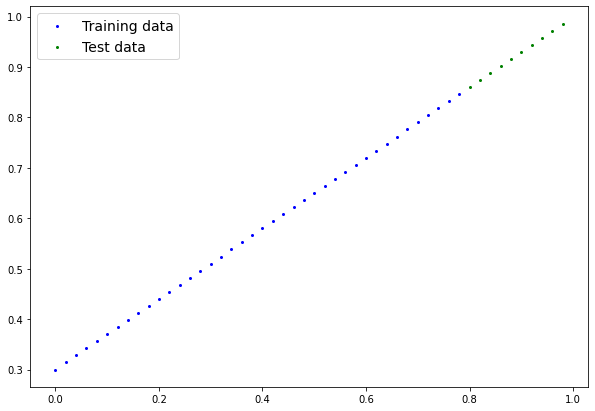

In [13]:
plot_predictions();

#Building model 

Our First Pytorch Model !



In [14]:
from torch import nn 

#Create linear regression model class 
#nn.module-is the base class of all neural networks model which contains all model for the neural networks  
class LinearRegressionModel(nn.Module):  #<- almost everything in PyTorch 
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    #requires.grad=True means Pytorch will track the gradients of this specific parameter for use with torch.autograd
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    
  def forward(self,x:torch.Tensor)->torch.Tensor:
      return self.weights *x + self.bias #This is the linear regression formula 
    

**What our model does** 


*   Starts with random values (weight & bias)
*   Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values we used to create the data)

**How does it do so?**

Through two main algorithms:
1. Gradient descent 
2. Backpropagation




### Pytorch model building essentials 
* torch.nn - contains all the buildings for computational graphs 
* torch.nn.Parameter - what parameters should our model try and learn ,
* torch.nn.Module - The base class for all neural network modules , if you subclass it, you should overwrite forward()
* torch.optim - This where the optimizers in PyTorch live,they will help with gradient descent 
* def forward()- All nn.module subclasses require you to overwrite forward(),this method defines what happens in the forward computation 






### Checking the contents of our Pytorch Model 
Now we've created a model let's see what's inside 
So we can check our model parameters or what's inside our model using .parameters()

In [15]:
torch.manual_seed(42)
model_0=LinearRegressionModel()
model_0

LinearRegressionModel()

In [16]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]


This manual seed will make the desired value within an inclusive range 

In [17]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [18]:
weight,bias

(0.7, 0.3)

We must start it with a random value and we should make it ensure that the random values which we had selected must be in the range which is same as the ideal values 

### Making Prediction using torch.inference_mode()

To check our model's predictive power,let's see how well it predicts y_test based on X_test
When we pass data through our model, it's going to run it through the forward() method 

In [19]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]), tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [20]:
#Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [21]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

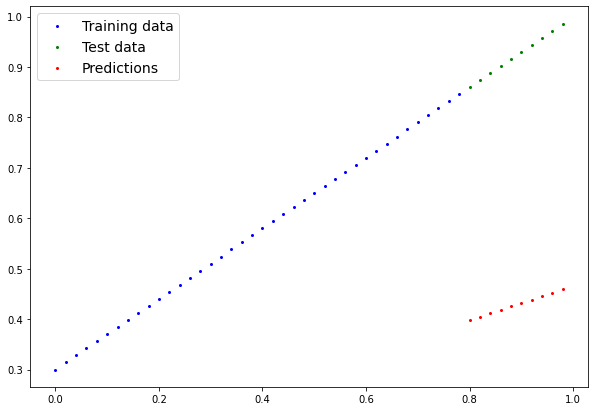

In [22]:
plot_predictions(predictions=y_preds)

## 3. Train model 
The whole idea of training is for a model to move from some *unknown* parameters(these maybe random) to some *known* paramters.
Or in other words from a poor representation of the data to a better representation of the data. 
One way to measure how poor or how wrong your models predictions are to use a loss function

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer it as a loss function .

Things we need to train:

* **Loss Function:** A function to measure how wrong your model's prediction to the ideal outputs, lower is better. 
* **Optimizer:** Takes into account the loss of a model and adjust the model's parameters (example: weight and bias ) to imporve the loss function

And specifically for PyTorch , we need
* A training loop
* A testing  loop


In [23]:
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

**Mean absolute error**:
  
MAE_loss=  torch.mean(torch.abs(y_pred-y_test)
   
             [or]

MAE_loss= torch.nn.L1Loss

In [24]:
#Setup a loss function
loss_fn = nn.L1Loss()

#Setup an optimizer
#We will be using stochastic gradient descent which means random Gradient Descent

In [25]:
#Checks out our model parameters
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)#learning rate

Smaller  the learning rate the smaller the range in the parameter .

For linear Regression model we can always choose SGD optimizer and the Mean absolute Error loss as they tend to give values which are closer to the problem set 

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop :
* Loop through the data
* Forward pass (this involves data moving through our model's `forward()` functions) - also called forward propogation
* Calculate the loss (compare forward pass predictions to ground truth labels)
* Optimizer zero grad
* Loss Backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss
(**backpropogation**)
* Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**) 



In [26]:

#An epoch is one loop through the data ...(this is a hyperparameter because we've set it ourselves)
epochs = 200
#Tracking different values
epoch_count=[]
loss_values=[]
test_loss_values=[]

###Training 
#0.Loop through the data 
for epoch in range(epochs):
  #Set the model to training mode 
  model_0.train() #Trains mode in Pytorch sets all the parameters that require gradients  
  #1.Forward Pass
  y_pred=model_0(X_train)
  #2.Calculate the loss 
  loss=loss_fn(y_pred,y_train)
  #3. Optimizer zero grad
  optimizer.zero_grad()
  #4.Perform backpropogation on the loss with respect to the parameters of the model
  loss.backward()
  #5.Step the optimizer()(Perform gradient Descent)
  optimizer.step() #By def
  ###Testing
  model_0.eval()  #Turns off Gradient Tracking
  with torch.inference_mode(): #Turns of gradient tracking and other more things 
    #1.Forward pass
    test_pred=model_0(X_test)
    #2.Calculate the loss
    test_loss=loss_fn(test_pred,y_test)
  #Print out what's happening
  if epoch % 10 == 0 :  
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss:{loss} | Test loss : {test_loss}")
    #Prints out model state dictionary()
    print(model_0.state_dict())  

Epoch: 0 | Loss:0.31288138031959534 | Test loss : 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss:0.1976713240146637 | Test loss : 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss:0.08908725529909134 | Test loss : 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss:0.053148526698350906 | Test loss : 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss:0.04543796554207802 | Test loss : 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss:0.04167863354086876 | Test loss : 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss:0.03818932920694351 | Test loss : 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [27]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)


In [28]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

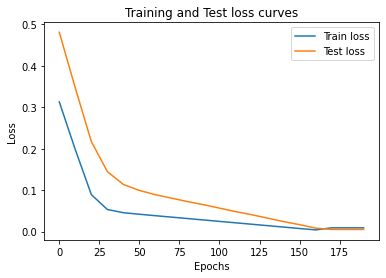

In [31]:
import numpy as np
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="Train loss")
plt.plot(epoch_count,test_loss_values,label="Test loss")
plt.title("Training and Test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

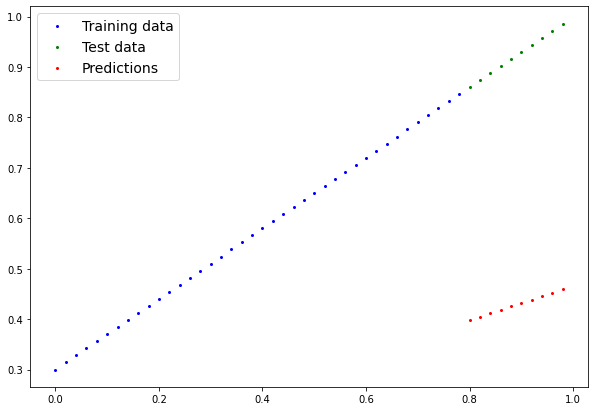

In [33]:
plot_predictions(predictions=y_preds);

In [34]:
weight,bias

(0.7, 0.3)

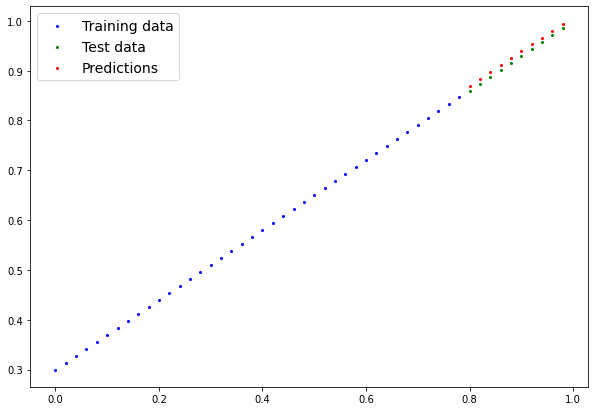

In [35]:
plot_predictions(predictions=y_preds_new);

#Saving a Model in Pytorch

There are three main methods you should about for saving and loading models in Pytorch 

1. `torch.save()` - allows you save a PyTorch object in Python's pickle format 
2. `torch.load()` - allows you to load or save a pyTorch object 
3. `torch.nn.Module.load_state_dict()` - This allows to load a model's saved state dictionary

In [36]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [39]:
#Saving our PyTorch model 
from pathlib import Path

#1.Create models directory
MODEL_PATH= Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create a model save path 
MODEL_NAME="01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

#3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [40]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1207 Dec 31 15:45 01_pytorch_workflow_model_0.pth


#Loading a PyTorch model 

Since we saved our model's `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.


In [42]:
# To load in a saved state_dict we have to instantiate a new instance of our model class 
loaded_model_0 = LinearRegressionModel()

#Load the saved state_dict of model_0 (This will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [43]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [44]:
#Make some predictions with our loaded model 
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds =loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [49]:
#Compare loaded model preds with original model preds
y_preds_new == loaded_model_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [48]:
y_preds==loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [50]:
model_0.eval()
with torch.inference_mode():
  y_preds=model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [51]:
y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### Putting it all together

Let's go back through the steps above and see it all in one place.


In [53]:
#import Pytorch and matplotlib
import torch 
from torch import nn 
import matplotlib.pyplot as plt



In [56]:
#Create some data using the linear Regression formula of y=weight*X+bias
weight=0.7
bias=0.3

#Create range values 
start=0
end=1
step=0.02

#Create X and Y (features and ranges)
X=torch.arange(start,end,step).unsqueeze(dim=1) #without unsqueeze errors pops up
y=weight*X+bias
X[:10],y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [57]:
#Split the data 
train_split=int(0.8*len(X))
X_train, y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_test),len(y_test),len(X_train),len(y_train)

(10, 10, 40, 40)

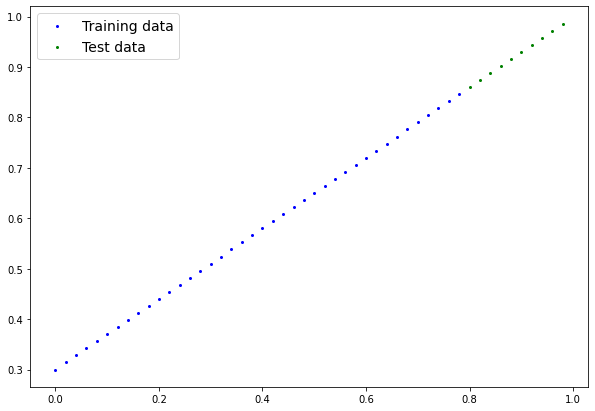

In [58]:
#Plot the data 
#Note:If you don't have the plot_predictions() function loaded,this will error
plot_predictions(X_train,y_train,X_test,y_test)

In [60]:
from torch import nn
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #Use nn.linear() for creating the model parameters/Also called linear Transform ,probing layer,fully connected layer,dense layer
    self.linear_layer = nn.Linear(in_features=1,out_features=1)

  def forward(self,x:torch.Tensor)-> torch.Tensor:
    return self.linear_layer(x)
#set the manual seed(42)
torch.manual_seed(42)
model_1=LinearRegressionModelV2()
model_1,model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [61]:
#check the model current device 
next(model_1.parameters()).device

device(type='cpu')

In [63]:
loss_fn=nn.L1Loss()

In [65]:
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [68]:
torch.manual_seed(42)

epochs =200

for epoch in range (epochs):
  model_1.train()

  y_pred=model_1(X_train)

  loss=loss_fn(y_pred,y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()
  
  with torch.inference_mode():
    test_pred=model_1(X_test)
    test_loss=loss_fn(test_pred,y_test)
  if epoch %10==0:
    print(f"Epoch: {epoch} | Loss:{loss} | Test loss : {test_loss}")
    

Epoch: 0 | Loss:0.0012645035749301314 | Test loss : 0.013801807537674904
Epoch: 10 | Loss:0.0012645035749301314 | Test loss : 0.013801807537674904
Epoch: 20 | Loss:0.0012645035749301314 | Test loss : 0.013801807537674904
Epoch: 30 | Loss:0.0012645035749301314 | Test loss : 0.013801807537674904
Epoch: 40 | Loss:0.0012645035749301314 | Test loss : 0.013801807537674904
Epoch: 50 | Loss:0.0012645035749301314 | Test loss : 0.013801807537674904
Epoch: 60 | Loss:0.0012645035749301314 | Test loss : 0.013801807537674904
Epoch: 70 | Loss:0.0012645035749301314 | Test loss : 0.013801807537674904
Epoch: 80 | Loss:0.0012645035749301314 | Test loss : 0.013801807537674904
Epoch: 90 | Loss:0.0012645035749301314 | Test loss : 0.013801807537674904
Epoch: 100 | Loss:0.0012645035749301314 | Test loss : 0.013801807537674904
Epoch: 110 | Loss:0.0012645035749301314 | Test loss : 0.013801807537674904
Epoch: 120 | Loss:0.0012645035749301314 | Test loss : 0.013801807537674904
Epoch: 130 | Loss:0.0012645035749301

In [70]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])